Accuracy: 0.7541899441340782


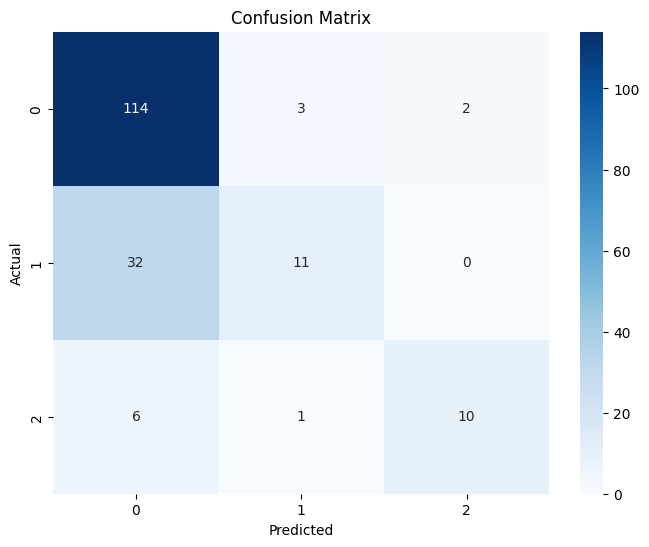

In [8]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    data = pd.read_csv("train.csv")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please upload the file.")
    exit()

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Handle non-numeric data (if any)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.factorize(X[col])[0]
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") #Removed xticklabels and yticklabels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy with default n_estimators: 0.7541899441340782
Best Accuracy: 0.770949720670391 achieved with n_estimators: 71


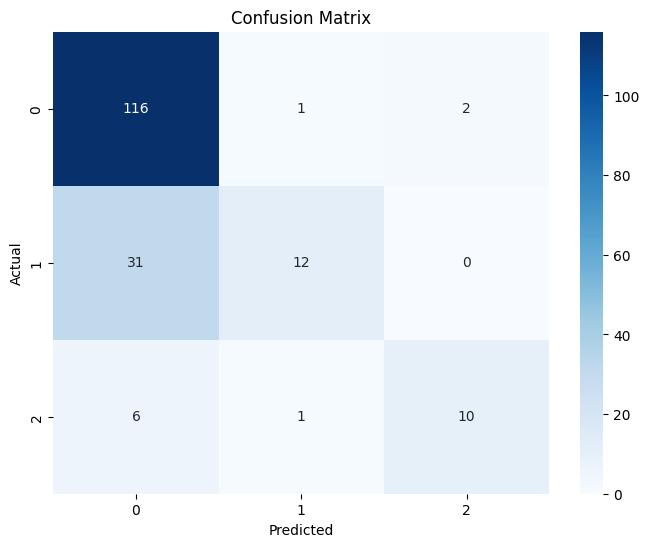

In [9]:
# prompt: Write Python code to predict species of flower using Random forest classifier. consider iris dataset
# Measure prediction score using default n_estimators=10
# Fine tune the model by changing the value of n_estimators and get the best score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    data = pd.read_csv("train.csv")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please upload the file.")
    exit()

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Handle non-numeric data (if any)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.factorize(X[col])[0]
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial Random Forest Classifier with default n_estimators
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with default n_estimators: {accuracy}")

# Fine-tune n_estimators
best_accuracy = 0
best_n_estimators = 0
for n_estimators in range(1, 201, 10):  # Test values from 1 to 200 with step 10
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best Accuracy: {best_accuracy} achieved with n_estimators: {best_n_estimators}")

# Train with best n_estimators and show confusion matrix
rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


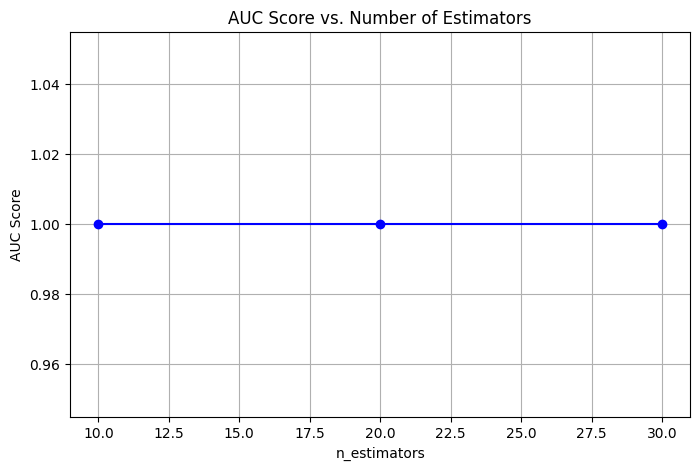

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Load the Iris dataset
df = pd.read_csv("iris.csv")  # Ensure 'iris.csv' is in your working directory

# Prepare features and target
X = df.drop('species', axis=1)
y = df['species']

# Binarize the target labels for one-vs-rest AUC
y_bin = label_binarize(y, classes=y.unique())
n_classes = y_bin.shape[1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Define list of n_estimators to evaluate
n_estimators_list = [10, 20, 30]
auc_scores = []

# Train RandomForest and compute AUC for each n_estimators value
for n in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)

    # Predict probabilities
    y_prob = clf.predict_proba(X_test)

    # For multiclass, RandomForest returns a list of arrays (one for each class)
    if isinstance(y_prob, list):
        y_prob_stack = np.stack([prob[:, 1] for prob in y_prob], axis=1)
    else:
        y_prob_stack = y_prob

    # Compute macro-average AUC score
    auc = roc_auc_score(y_test, y_prob_stack, average='macro', multi_class='ovr')
    auc_scores.append(auc)

# Plotting AUC Score vs. n_estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, auc_scores, marker='o', linestyle='-', color='blue')
plt.title("AUC Score vs. Number of Estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC Score")
plt.grid(True)
plt.show()
